Data set from Kaggle: 

https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

In [1]:
!pip install catboost matplotlib pandas scikit-learn kaggle optuna ipywidgets kaleido shap jupyterlab-rise

  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl.metadata (15 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   - -------------------------------------- 3.4/102.5 MB 22.3 MB/s eta 0:00:05
   --- ------------------------------------ 9.7/102.5 MB 27.4 MB/s eta 0:00:04
   ------- -------------------------------- 18.9/102.5 MB 34.0 MB/s eta 0:00:03
   ---------- ----------------------------- 27.0/102.5 MB 35.7 MB/s eta 0:00:03
   ------------ --------------------------- 31.7/102.5 MB 36.0 MB/s eta 0:00:02
   ------------ ---------------------------

In [1]:
!ls ../../../home/vscode

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
from pathlib import Path
container_check = os.getenv("iscontainer")
if container_check=="y":
    config_dir = Path("/home/vscode/.config/kaggle")
    config_dir.mkdir(parents=True, exist_ok=True)
    
    with open(config_dir / "kaggle.json", "w") as dst:
        with open("./kaggle.json", "r") as src:
            dst.write(src.read())

In [ ]:
import os
import zipfile
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# dataset = "heart-disease-dataset"
# dataset_test = "mexwell/heart-disease-dataset"
# download_folder = Path("data/heart-disease")
# zip_path = download_folder / "heart-disease.zip"
# download_folder.mkdir(parents=True, exist_ok=True)

# api.competition_download_files(dataset, path=str(download_folder))
# api.dataset_download_files(dataset_test, path=str(download_folder), unzip=True)

dataset_name = "mexwell/heart-disease-dataset"
download_folder = Path("data/heart-disease")
download_folder.mkdir(parents=True, exist_ok=True)

api.dataset_download_files(dataset_name, path=str(download_folder), unzip=True)


# with zipfile.ZipFile(zip_path, "r") as zip_ref:
#     zip_ref.extractall(str(download_folder))
# os.remove(zip_path)

Dataset URL: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset


In [4]:
!dir "./data/heart-disease"

 Volume in drive C has no label.
 Volume Serial Number is D0EF-588E

 Directory of c:\Users\Wojciech\Documents\WWSI\ARISA-MLOps-Assignment\data\heart-disease

26.04.2025  21:22    <DIR>          .
26.04.2025  21:22    <DIR>          ..
26.04.2025  21:22           420�674 documentation.pdf
26.04.2025  21:22            39�689 heart_statlog_cleveland_hungary_final.csv
               2 File(s)        460�363 bytes
               2 Dir(s)  104�351�211�520 bytes free


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(download_folder / "heart_statlog_cleveland_hungary_final.csv")
# df_ids = df_train.pop("PassengerId")
#df.sample(10)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 390 to 599
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  238 non-null    int64  
 1   sex                  238 non-null    int64  
 2   chest pain type      238 non-null    int64  
 3   resting bp s         238 non-null    int64  
 4   cholesterol          238 non-null    int64  
 5   fasting blood sugar  238 non-null    int64  
 6   resting ecg          238 non-null    int64  
 7   max heart rate       238 non-null    int64  
 8   exercise angina      238 non-null    int64  
 9   oldpeak              238 non-null    float64
 10  ST slope             238 non-null    int64  
 11  target               238 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 24.2 KB


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 1005 to 1126
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  952 non-null    int64  
 1   sex                  952 non-null    int64  
 2   chest pain type      952 non-null    int64  
 3   resting bp s         952 non-null    int64  
 4   cholesterol          952 non-null    int64  
 5   fasting blood sugar  952 non-null    int64  
 6   resting ecg          952 non-null    int64  
 7   max heart rate       952 non-null    int64  
 8   exercise angina      952 non-null    int64  
 9   oldpeak              952 non-null    float64
 10  ST slope             952 non-null    int64  
 11  target               952 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 96.7 KB


In [7]:
y_train = df_train.pop("target")
X_train = df_train


KeyError: 'target'

In [ ]:
y_test = df_test.pop("target")
X_test = df_test

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
390,61,1,4,160,0,1,1,145,0,1.0,2
247,54,1,3,120,237,0,0,150,1,1.5,2
260,55,0,2,122,320,0,0,155,0,0.0,1
155,56,1,4,155,342,1,0,150,1,3.0,2
984,60,0,4,150,258,0,2,157,0,2.6,2
...,...,...,...,...,...,...,...,...,...,...,...
535,59,1,4,125,222,0,0,135,1,2.5,3
1037,52,1,1,152,298,1,0,178,0,1.2,2
812,55,0,2,135,250,0,2,161,0,1.4,2
139,43,1,4,150,247,0,0,130,1,2.0,2


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 1005 to 1126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  952 non-null    int64  
 1   sex                  952 non-null    int64  
 2   chest pain type      952 non-null    int64  
 3   resting bp s         952 non-null    int64  
 4   cholesterol          952 non-null    int64  
 5   fasting blood sugar  952 non-null    int64  
 6   resting ecg          952 non-null    int64  
 7   max heart rate       952 non-null    int64  
 8   exercise angina      952 non-null    int64  
 9   oldpeak              952 non-null    float64
 10  ST slope             952 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 89.2 KB


In [10]:
import joblib
import optuna
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv

outfolder = Path("results")
outfolder.mkdir(parents=True, exist_ok=True)

best_params_path = outfolder / "best_params.pkl"

if not best_params_path.is_file():
    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    
    def objective(trial):
        params = {
            "depth": trial.suggest_int("depth", 2, 10),
            "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3),
            "iterations": trial.suggest_int("iterations", 100, 300),
            "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-5, 100.0, log=True),
            "bagging_temperature": trial.suggest_float("bagging_temperature", 0.01, 1),
            "random_strength": trial.suggest_float("random_strength", 1e-5, 100.0, log=True)
        }
        model = CatBoostClassifier(**params, verbose=0)
        model.fit(X_train_opt, y_train_opt, eval_set=(X_val_opt, y_val_opt), early_stopping_rounds=50)
        return model.get_best_score()["validation"]["Logloss"]
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=50)
    
    joblib.dump(study.best_params, best_params_path)
    params = study.best_params
else:
    params = joblib.load(best_params_path)
print("Best Parameters:", params)

Best Parameters: {'depth': 9, 'learning_rate': 0.1989710549297809, 'iterations': 225, 'l2_leaf_reg': 5.203681083589466, 'bagging_temperature': 0.6748870052060675, 'random_strength': 0.27921747675539976}


In [11]:
params["eval_metric"] = "F1"
params["loss_function"] = "Logloss"

model = CatBoostClassifier(
    **params,
    verbose=True
)

data = Pool(X_train, y_train)

cv_results = cv(
    params=params,
    pool=data,
    fold_count=5,
    partition_random_seed=42,
    shuffle=True,
)

cv_results.to_csv(outfolder / "cv_results.csv", index=False)

Training on fold [0/5]
0:	learn: 0.9111969	test: 0.7977528	best: 0.7977528 (0)	total: 142ms	remaining: 31.8s
1:	learn: 0.9408805	test: 0.8494624	best: 0.8494624 (1)	total: 145ms	remaining: 16.2s
2:	learn: 0.9375000	test: 0.8615385	best: 0.8615385 (2)	total: 148ms	remaining: 11s
3:	learn: 0.9486859	test: 0.8691099	best: 0.8691099 (3)	total: 151ms	remaining: 8.36s
4:	learn: 0.9589041	test: 0.8677249	best: 0.8691099 (3)	total: 155ms	remaining: 6.81s
5:	learn: 0.9612984	test: 0.8854167	best: 0.8854167 (5)	total: 158ms	remaining: 5.77s
6:	learn: 0.9652605	test: 0.8808290	best: 0.8854167 (5)	total: 161ms	remaining: 5.02s
7:	learn: 0.9714994	test: 0.8979592	best: 0.8979592 (7)	total: 164ms	remaining: 4.46s
8:	learn: 0.9725686	test: 0.8865979	best: 0.8979592 (7)	total: 168ms	remaining: 4.02s
9:	learn: 0.9775561	test: 0.8958333	best: 0.8979592 (7)	total: 172ms	remaining: 3.69s
10:	learn: 0.9812734	test: 0.8958333	best: 0.8979592 (7)	total: 175ms	remaining: 3.41s
11:	learn: 0.9812734	test: 0.901

In [12]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add mean performance line
fig.add_trace(
    go.Scatter(
        x=cv_results["iterations"], y=cv_results["test-F1-mean"], mode="lines", name="Mean F1 Score", line=dict(color="blue")
    )
)

# Add shaded error region
fig.add_trace(
    go.Scatter(
        x=pd.concat([cv_results["iterations"], cv_results["iterations"][::-1]]),
        y=pd.concat([cv_results["test-F1-mean"]+cv_results["test-F1-std"], 
                     cv_results["test-F1-mean"]-cv_results["test-F1-std"]]),
        fill="toself", 
        fillcolor="rgba(0, 0, 255, 0.2)",
        line=dict(color="rgba(255, 255, 255, 0)"),
        showlegend=False
    )
)

# Customize layout
fig.update_layout(
    title="Cross-Validation (N=5) Mean F1 score with Error Bands",
    xaxis_title="Training Steps",
    yaxis_title="Performance Score",
    template="plotly_white",
    yaxis=dict(range=[0.5, 1])
)

fig.show()

fig.write_image(outfolder / "test_f1.png")

In [13]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add mean performance line
fig.add_trace(
    go.Scatter(
        x=cv_results["iterations"], y=cv_results["test-Logloss-mean"], mode="lines", name="Mean logloss", line=dict(color="blue")
    )
)

# Add shaded error region
fig.add_trace(
    go.Scatter(
        x=pd.concat([cv_results["iterations"], cv_results["iterations"][::-1]]),
        y=pd.concat([cv_results["test-Logloss-mean"]+cv_results["test-Logloss-std"], 
                     cv_results["test-Logloss-mean"]-cv_results["test-Logloss-std"]]),
        fill="toself", 
        fillcolor="rgba(0, 0, 255, 0.2)",
        line=dict(color="rgba(255, 255, 255, 0)"),
        showlegend=False
    )
)

# Customize layout
fig.update_layout(
    title="Cross-Validation (N=5) Mean Logloss with Error Bands",
    xaxis_title="Training Steps",
    yaxis_title="Logloss",
    template="plotly_white"
)

fig.show()

fig.write_image(outfolder / "test_logloss.png")

In [14]:
model.fit(
    X_train,
    y_train,
    verbose_eval=50,
    early_stopping_rounds=50,
    use_best_model=False,
    plot=True
)

model.save_model(outfolder / 'catboost_model_heart_disease.cbm')
joblib.dump(params, outfolder / 'model_params.pkl')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9014085	total: 4.62ms	remaining: 1.03s
50:	learn: 0.9989970	total: 207ms	remaining: 707ms
100:	learn: 1.0000000	total: 402ms	remaining: 494ms
150:	learn: 1.0000000	total: 588ms	remaining: 288ms
200:	learn: 1.0000000	total: 778ms	remaining: 92.9ms
224:	learn: 1.0000000	total: 869ms	remaining: 0us


['results\\model_params.pkl']

In [19]:
#df_test = pd.read_csv(download_folder / "test.csv")

In [15]:
model.predict(df_test)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [16]:
preds = model.predict(df_test[X_train.columns])

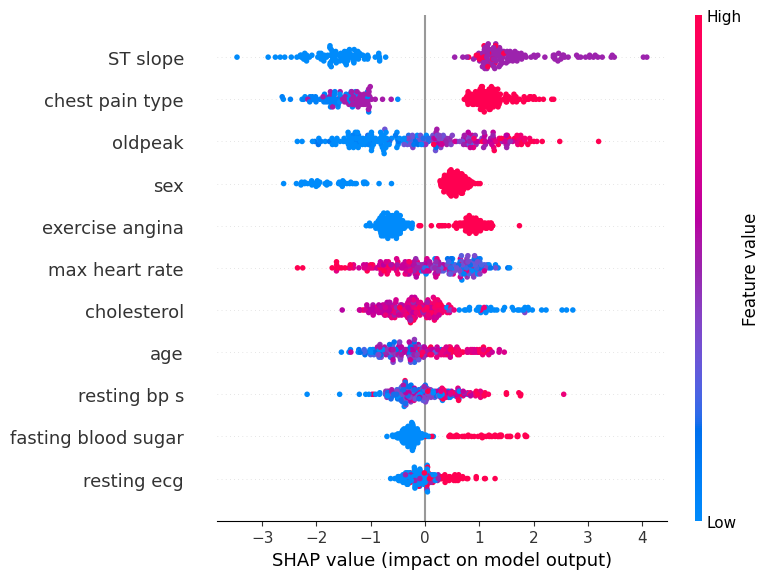

In [17]:
import shap
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_test)

shap.summary_plot(shap_values, df_test, show=False)
plt.savefig(outfolder / "test_shap_overall.png")

In [18]:
df_test["target"] = preds
df_test.to_csv(outfolder / "predictions.csv", index=False)